4. Code up a 2-class perceptron learning algorithm and classifier. For this problem, you may use only python built-in functions, numpy, matplotlibmatplotlib; you may use the PlotDecBoundaries.py function provided with Homework 1; and you may use pandas only for reading and/or writing csv files. Please observe the following:
(i) For the optimization, use basic sequential GD. Also use SGD variant 1, which is the same as basic sequential GD, except a shuffle is done at the start of every epoch whereas in basic sequential GD a shuffle is done only before the first epoch and the order is held fixed thereafter.
(ii) For the initial weight vector, use w(0) = a1, in which 𝑎 = 0.1 .
(iii) For the learning rate parameter, use η(i) = 1 ∀% .
(iv) For the halting condition, use 2 conditions, such that it halts when either one is met:
i.1 When all the training data points are correctly classified. In this case, it also outputs the statement “data is linearly separable”.
i.2 When 10,000 iterations have been performed. In this case, choose for the
final weight vector w7 as the weight vector corresponding to the lowest J$w% over all iterations.
(v) You will also need a function that classifies any given data point, using the optimal w7 from the learning algorithm.

In [ ]:
# Importing the required libraries:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle
import copy
import random

In [ ]:
# Reading the dataset files:
def open_datasets(file):
    data = []
    
    with open(file) as csv_file: # Reading the file row-wise.
        df = csv.reader(csv_file, delimiter=',')
        
        for row in df:
            data.append(row)

    data = np.array(data).astype(float) # Converting the datapoints to a numpy floating point array.
    return data

In [ ]:
# Defining the classification function:
def classifier(datapoint, weight):
    dataset_dimension = datapoint.shape[0]
    weight_vec= np.zeros([dataset_dimension, 1]) # Initializing the weight vector.
    
    for ele in range(dataset_dimension):
        z_n = np.dot(weight.T, datapoint[ele, :])
        
        if z_n < 0:
          weight_vec[ele] = 2
        else:
          weight_vec[ele] = 1
        
    return weight_vec

In [ ]:
# Defining the criterion function for the classifier:
def criterion_function(weights, dp):
    dataset_dimension = dp.shape[0]
    J = 0
    
    for i in range(dataset_dimension):
        
        if np.dot(weights.T, dp[i, :]) < 0:
            J -= np.dot(weights.T, dp[i, :])
    
    return J

In [ ]:
# Computing the misclassification rate:
def misclassification_rate(true, predicted):
    count = 0
    
    for iter in range(len(predicted)):
        
        if true[iter] != predicted[iter]:
                   count += 1
    
    accuracy = 100 * count / len(predicted)
    return accuracy

In [ ]:
# this function is from Prof. Chugg's nearest_means_classifier notebook
# https://github.com/keithchugg/ee559_spring2023/blob/main/lecture/nearest_means_classifier.ipynb
# Defining a function to plot graphs:
def graph_func(data, label, w):
    x = np.linspace(min(data[:, 1]), max(data[:, 1]))
    y = -(w[0] + w[1] * x) / w[2]
    plt.plot(x, y, label = 'Decision Boundary')
    plt.scatter(data[label == 1, 1], data[label == 1, 2], c = 'orange', label = 'Γ1')
    plt.scatter(data[label == 2, 1], data[label == 2, 2], c = 'yellow', label = 'Γ2')
    plt.legend() 

(a) For the synthetic dataset1 given with Homework 1, implement the following:
(i) Run the perceptron learning algorithm to find w7. Give the resulting w7 vector; state whether the algorithm converged (i.1 reached)
or halted without convergence (i.2 reached); and give the final criterion function value J$w7%.
(ii) Produce a learning curve, which is a plot of the values of the criterion function during the training process. If the training goes for more than 10 epochs, plot the criterion function vs. epochs. If training ends before 10 epochs, plot the criterion function vs. iterations. Recall that one epoch is one pass through the entire training set while one iteration is one weight vector update. You may also want to include the misclassification rate vs. epoch (or iterations) on this plot as well.
(iii) Run the perceptron classifier on the training set and the test set using the final w7. Give the classification error of each.
(iv) Plot in feature space the training data points, decision boundaries, and decision regions. The decision boundaries and regions should use the final w7.

In [ ]:
data = open_datasets('dataset1_train.csv')
random_shuffle = shuffle(data, random_state = 0)
X = np.array(random_shuffle[:, :2])
y = np.array(random_shuffle[:, 2])
X = np.vstack([np.ones([1, 100]), X.T]).T
w = 0.1 * np.ones([3, 1])
weights_list = np.ones([3, 10000])
index_list = []
reflected_data = copy.deepcopy(X)
dataset_dimension = int(X.shape[0])
J = np.zeros([10000])
epoch = int(10000 / dataset_dimension)
list_epoch = []

for line in range(dataset_dimension):
    
    if y[line] == 2:
        reflected_data[line, :] *= -1
        
for i in range(epoch):
    flag = None
    count = 0
    list_epoch.append(i + 1)
    
    for j in range(dataset_dimension):
        index = i * epoch + j
        index_list.append(index + 1)
        z_n = np.dot(w.T, reflected_data[j, :])
        
        if z_n <= 0:
            w += 1 * reflected_data[j, :].reshape([3, 1])
            count = 0
        else:
            count += 1
        weights_list[:, index] = w.T

    if count == 100:
        flag = 1
        print("The given data is linearly separable")
        break
    elif count > 100:
      flag = 0
      print("The algorithm did not converge!")
      break

for i in range(10000):
    J[i] = criterion_function(weights_list[:, i], reflected_data)

if flag == 0:
  print("The cost function for the best weights: ", np.min(J))

best_weight = weights_list[:, np.argmin(J)]
print("The best weights are: ", best_weight)

The given data is linearly separable
The best weights are:  [-0.9        -3.40587521  3.54772706]


In [ ]:
class_label = classifier(X, best_weight)
data = open_datasets('dataset1_test.csv')
test_x = np.array(data[:, :2])
test_y = np.array(data[:, 2])
X_test = np.vstack([np.ones([1, 100]), test_x.T]).T
test_label = classifier(X_test, best_weight)
print("The misclassification rate of the training_1 dataset = ", misclassification_rate(y, class_label), "%")
print("The misclassification rate of the testing_1 dataset = ", misclassification_rate(test_y, test_label), "%")

The misclassification rate of the training_1 dataset =  0.0 %
The misclassification rate of the testing_1 dataset =  0.0 %


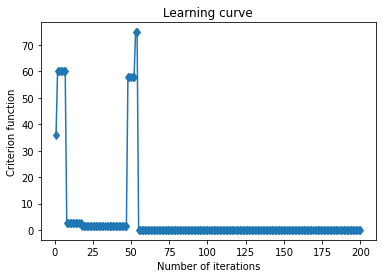

In [ ]:
if len(list_epoch) > 10:
  plt.xlabel("Number of epochs")
else:
  plt.xlabel("Number of iterations")

plt.ylabel("Criterion function")
plt.title("Learning curve")
plt.plot(index_list, J[:len(index_list)], marker = 'd')

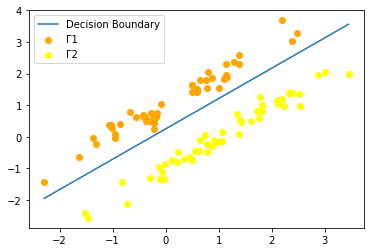

In [ ]:
graph_func(X, np.array(y), best_weight)

(b) Repeat part (a) except use the synthetic dataset2 datasets given with Homework 1

In [ ]:
data = open_datasets('dataset2_train.csv')
random_shuffle = shuffle(data, random_state = 0)
X = np.array(random_shuffle[:, :2])
y = np.array(random_shuffle[:, 2])
X = np.vstack([np.ones([1, 100]), X.T]).T
w = 0.1 * np.ones([3, 1])
weights_list = np.ones([3, 10000])
index_list = []
reflected_data = copy.deepcopy(X)
dataset_dimension = int(X.shape[0])
epoch = int(10000 / dataset_dimension)
list_epoch = []
J = np.zeros([10000])

for i in range(dataset_dimension):
    
    if y[i] == 2:
        reflected_data[i, :] *= -1

for i in range(epoch):
    flag = None
    count = 0
    list_epoch.append(i + 1)
    
    for j in range(dataset_dimension):
        index = i * epoch + j
        index_list.append(index + 1)
        z_n = np.dot(w.T, reflected_data[j, :])
        
        if z_n <= 0:
            w += 1 * reflected_data[j, :].reshape([3, 1])
            count = 0
        else:
            count += 1
        weights_list[:, index] = w.T

    if count == 100:
        flag = 1
        print("The given data is linearly separable")
        break
    elif count > 100:
      flag = 0
      print("The algorithm did not converge!")
      break
        
for i in range(10000):
    J[i] = criterion_function(weights_list[:, i], reflected_data)

if flag == 0:
  print("The cost function for the best weights: ", np.min(j))

best_weight = weights_list[:, np.argmin(J)]
print("The best weights are: ", best_weight)

The given data is linearly separable
The best weights are:  [-1.9        -0.18105057  3.39353714]


In [ ]:
class_label = classifier(X, best_weight)
data = open_datasets('dataset2_test.csv')
X_test = np.array(data[:, :2])
y_test = np.array(data[:, 2])
X_test = np.vstack([np.ones([1, 100]), X_test.T]).T
test_label = classifier(X_test, best_weight)
print("The misclassification rate of the training_2 dataset = ", misclassification_rate(y, class_label), "%")
print("The misclassification rate of the testing_2 dataset = ", misclassification_rate(y_test, test_label), "%")

The misclassification rate of the training_2 dataset =  0.0 %
The misclassification rate of the testing_2 dataset =  0.0 %


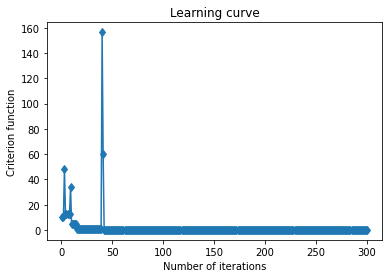

In [ ]:
if len(list_epoch) > 10:
  plt.xlabel("Number of epochs")
else:
  plt.xlabel("Number of iterations")

plt.ylabel("Criterion function")
plt.title("Learning curve")
plt.plot(index_list, J[:len(index_list)], marker = 'd')

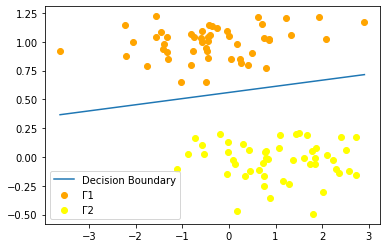

In [ ]:
graph_func(X, y, best_weight)

(c) Repeat part (a) except use the synthetic dataset3 datasets given with Homework 1.

In [ ]:
data = open_datasets('dataset3_train.csv')
random_shuffle = shuffle(data, random_state = 10)
X = np.array(random_shuffle[:, :2])
y = np.array(random_shuffle[:, 2])
X = np.vstack([np.ones([1, 100]), X.T]).T
w = 0.1 * np.ones([3, 1])
weights_list = np.ones([3, 10000])
index_list = []
reflected_data = copy.deepcopy(X)
dataset_dimension = int(X.shape[0])
epoch = int(10000 / dataset_dimension)
list_epoch = []
J = np.zeros([10000])

for i in range(dataset_dimension):
    if y[i] == 2:
        reflected_data[i, :] *= -1

for i in range(epoch):
    count = 0
    list_epoch.append(i + 1)
    
    for j in range(dataset_dimension):
        index = i * epoch + j
        index_list.append(index + 1)
        z_n = np.dot(w.T, reflected_data[j, :])
        
        if z_n <= 0:
            w += 1 * reflected_data[j, :].reshape([3, 1])
            count = 0
        else:
            count += 1
        weights_list[:, index] = w.T

    if count == 100:
        print("The given data is linearly separable")
        break

for i in range(10000):
    J[i] = criterion_function(weights_list[:, i], reflected_data)
    
best_weight = weights_list[:, np.argmin(J)]
print("The best weights are: ", best_weight)
print("The algorithm did not converge!")
print("The cost function for the best weights: ", np.min(J))

The best weights are:  [ 0.1        -0.09394461 -0.14335023]
The algorithm did not converge!
The cost function for the best weights:  4.637582269755614


In [ ]:
class_label = classifier(X, best_weight)
data = open_datasets('dataset3_test.csv')
X_test = np.array(data[:, :2])
y_test = np.array(data[:, 2])
X_test = np.vstack([np.ones([1, 100]), X_test.T]).T
test_label = classifier(X_test, best_weight)
print("The misclassification rate of the training_3 dataset = " , misclassification_rate(y, class_label), "%")
print("The misclassification rate of the testing_3 dataset = ", misclassification_rate(y_test, test_label), "%")

The misclassification rate of the training_3 dataset =  23.0 %
The misclassification rate of the testing_3 dataset =  22.0 %


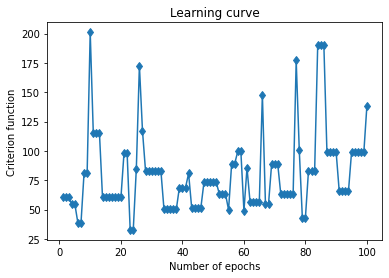

In [ ]:
if len(list_epoch) > 10:
  plt.xlabel("Number of epochs")
else:
  plt.xlabel("Number of iterations")

plt.ylabel("Criterion function")
plt.title("Learning curve")
plt.plot(list_epoch, J[:len(list_epoch)], marker = 'd')

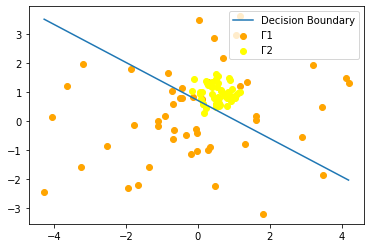

In [ ]:
graph_func(X, y, best_weight)

(d) Repeat part (a) except use the breast cancer dataset. The data is provided in a .npy file for both train and test. The training data comprises 480 data points and the test set is 31 points. The feature vector has dimension D=30. The data has 31 dimensions, with the first component being the label: 1 = Malignant, 2 = Benign. More details and resources will be posted with the data. When working with the breast cancer data, you will find that the features vary significantly in their dynamic range. You should normalize this data. You can use sklearn.preprocessing.normalize() to normalize the BC data. Specifically, a recommended normalization that works well with the weight
vector initialization is: x = 100 * skilearn.preprocesing.normalize(x, axis = 0, norm = 'l1'). It is a good idea to visually inspect (i.e., do some plotting) of your data before and after normalization.

In [ ]:
def normalize_data(x):
    x = 100 * normalize(x, axis = 0, norm = 'l1')
    return x

In [ ]:
data = np.load('breast_cancer_train.npy')
reorder_data = shuffle(data, random_state = 10)
dataset_dimension = int(data.shape[0]) 
X = reorder_data[:, 1:]
y = reorder_data[:, 0]
X = normalize_data(X)
X = np.vstack([np.ones([1, dataset_dimension]), X.T]).T
reflected_data = copy.deepcopy(X)
feature_size = X.shape[1]
w = 0.1 * np.ones([feature_size, 1])
weights_list = np.ones([feature_size, 10000])
epoch = int(10000 / dataset_dimension)
index_list = []
count_norm = 0
list_epoch = []
J = np.zeros([10000])

for i in range(dataset_dimension):
    
    if y[i] == 2:
        reflected_data[i, :] *= -1
        
for i in range(epoch + 1):
    count = 0
    list_epoch.append(i + 1)
    
    for j in range(dataset_dimension):
        count_norm += 1
        index_list.append(count_norm)
        z_n = np.dot(w.T, reflected_data[j, :])
        
        if z_n <= 0:
            w += 1 * reflected_data[j, :].reshape([feature_size, 1])
            count = 0
        else:
            count += 1
        
        if count_norm < 10000:
            weights_list[:, count_norm] = w.T
    
    if count_norm == 10000:
        break
    
    if count == dataset_dimension:
        print("The given data is linearly separable")
        break

for i in range(10000):
    J[i] = criterion_function(weights_list[:, i], reflected_data)

best_weight = weights_list[:, np.argmin(J)]
print("The best weights are ", best_weight)
print("The algorithm did not converge!")
print("The cost function for the best weights: ", np.min(J))

The best weights are  [-5.9         0.4720722   1.45337732  0.54012608  2.2135899  -0.89948393
 -0.51753194  3.43072675  3.81417231 -0.65328251 -1.65124797  2.0384367
  0.27025276  1.24074066  4.21210027 -1.3295186  -1.69061993 -2.74964089
 -0.88014653  0.58624999 -2.79438405  1.45423265  2.92592155  1.41325085
  3.98447618  0.2865009   2.00500563  3.51700504  4.02139615  1.95692788
 -0.3591248 ]
The algorithm did not converge!
The cost function for the best weights:  3.836599664343942


In [ ]:
class_label = classifier(X, best_weight)
data_test = np.load('breast_cancer_test.npy')
X_test = np.array(data_test[:, 1:])
y_test = np.array(data_test[:, 0])
X_test = normalize_data(X_test)
X_test = np.vstack([np.ones([1, int(data_test.shape[0])]), X_test.T]).T
test_label = classifier(X_test, best_weight)
print("The misclassification rate for the training data is = ", misclassification_rate(y, class_label), "%")
print("The misclassification rate for the testing dataset is = ", misclassification_rate(y_test, test_label), "%")

The misclassification rate for the training data is =  2.0833333333333335 %
The misclassification rate for the testing dataset is =  51.68539325842696 %


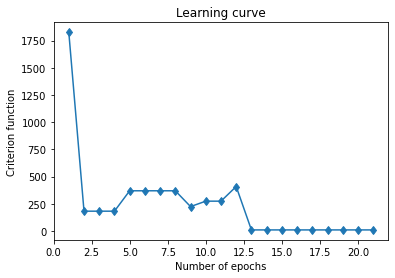

In [ ]:
if len(list_epoch) > 10:
  plt.xlabel("Number of epochs")
else:
  plt.xlabel("Number of iterations")

plt.ylabel("Criterion function")
plt.title("Learning curve")
plt.plot(list_epoch, J[:len(list_epoch)], marker = 'd')

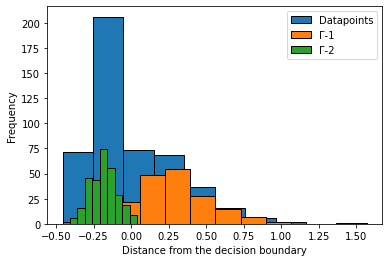

In [ ]:
"""
This function is based on chugg_foo() function in Prof. Chugg's nearest_means_classifier notebook
https://github.com/keithchugg/ee559_spring2023/blob/main/lecture/nearest_means_classifier.ipynb
"""
data_histx = data[:, 1:]
data_histy = data[:, 0]
data_histx = normalize_data(data_histx)
data_histx = np.vstack([np.ones([1, dataset_dimension]), data_histx.T]).T
data_list = []

for i in range(dataset_dimension):
    value = np.dot(best_weight.T, data_histx[i, :]) / np.linalg.norm(best_weight)
    data_list.append([value])

data_list = np.array([data_list]).reshape(480, 1)
class_1 = data_list[data_histy == 1]
class_2 = data_list[data_histy == 2]
plt.hist(data_list, label = 'Datapoints', edgecolor = 'black')
plt.hist(class_1, label = 'Γ-1', edgecolor = 'black')
plt.hist(class_2, label = 'Γ-2', edgecolor = 'black')
plt.xlabel("Distance from the decision boundary")
plt.ylabel("Frequency")
plt.legend()

# **SGD Method (Variant 1)**







**Question 4(a)**

In [ ]:
data = open_datasets('dataset1_train.csv')
dataset_dimension = int(data.shape[0])
epoch = int(10000 / dataset_dimension)
list_epoch = []
J = np.zeros([10000])
w = 0.1*np.ones([3, 1])
weights_list = np.ones([3, 10000])
index_list = []

for i in range(epoch):
    count = 0
    random_shuffle = shuffle(data)
    X = np.array(random_shuffle[:, :2])
    y = np.array(random_shuffle[:, 2])
    X = np.vstack([np.ones([1, 100]), X.T]).T
    reflected_data = copy.deepcopy(X)

    for ele in range(dataset_dimension):
        
        if y[ele] == 2:
            reflected_data[ele, :] *= -1
            
    list_epoch.append(i + 1)
    
    for j in range(dataset_dimension):
        index = i * epoch + j
        index_list.append(index + 1)
        z_n = np.dot(w.T, reflected_data[j, :])
        
        if z_n <= 0:
            w += 1 * reflected_data[j, :].reshape([3, 1])
            count = 0
        else:
            count += 1
        weights_list[:, index] = w.T

    if count == 100:
        print("The given data is linearly separable")
        break
        
for i in range(10000):
    J[i] = criterion_function(weights_list[:, i], reflected_data)
    
best_weight = weights_list[:, np.argmin(J)]
print("The most optimal weights are ", best_weight)

The given data is linearly separable
The most optimal weights are  [ 0.1        -3.93264443  4.39200058]


In [ ]:
class_label = classifier(X, best_weight)
data = open_datasets('dataset1_test.csv')
X_test = np.array(data[:, :2])
y_test = np.array(data[:, 2])
X_test = np.vstack([np.ones([1, 100]), X_test.T]).T
test_label = classifier(X_test, best_weight)
print("The misclassification rate for the training_1 data = ", misclassification_rate(y, class_label), "%")
print("The misclassification rate for the testing_1 dataset = ", misclassification_rate(y_test, test_label), "%")

The misclassification rate for the training_1 data =  0.0 %
The misclassification rate for the testing_1 dataset =  0.0 %


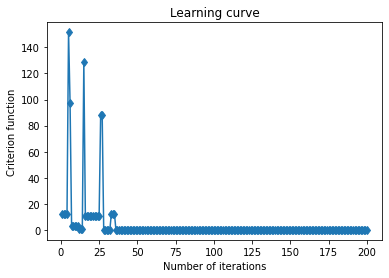

In [ ]:
if len(list_epoch) > 10:
  plt.xlabel("Number of epochs")
else:
  plt.xlabel("Number of iterations")

plt.ylabel("Criterion function")
plt.title("Learning curve")
plt.plot(index_list, J[:len(index_list)], marker = 'd')

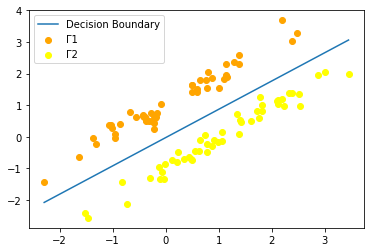

In [ ]:
graph_func(X, np.array(y), best_weight)

**Question 4(b)**

In [ ]:
data = open_datasets('dataset2_train.csv')
dataset_dimension = int(data.shape[0])
epoch = int(10000 / dataset_dimension)
list_epoch = []  
J = np.zeros([10000])
w = 0.1 * np.ones([3, 1])
weights_list = np.ones([3, 10000])
index_list = []

for i in range(epoch):
    count = 0
    random_shuffle = shuffle(data)
    X = np.array(random_shuffle[:, :2])
    y = np.array(random_shuffle[:, 2])
    X = np.vstack([np.ones([1, 100]), X.T]).T
    reflected_data = copy.deepcopy(X)

    for ele in range(dataset_dimension):
        
        if y[ele] == 2:
            reflected_data[ele, :] *= -1     
    
    list_epoch.append(i + 1)
    
    for j in range(dataset_dimension):
        index = i * epoch + j
        index_list.append(index + 1)
        z_n = np.dot(w.T, reflected_data[j, :])
        
        if z_n <= 0:
            w += 1 * reflected_data[j, :].reshape([3, 1])
            count = 0
        else:
            count += 1
        weights_list[:, index] = w.T

    if count == 100:
        print("The given data is linearly separable")
        break
        
for i in range(10000):
    J[i] = criterion_function(weights_list[:, i], reflected_data)
    
best_weight = weights_list[:, np.argmin(J)]
print("The best weights are ", best_weight)

The given data is linearly separable
The best weights are  [-1.9         0.03592419  3.66284817]


In [ ]:
class_label = classifier(X, best_weight)
data = open_datasets('dataset2_test.csv')
X_test_2 = np.array(data[:, :2])
y_test_2 = np.array(data[:, 2])
X_test_2 = np.vstack([np.ones([1, 100]), X_test_2.T]).T
test_label = classifier(X_test_2, best_weight)
print("The misclassification rate for the training_2 data = ", misclassification_rate(y, class_label), "%")
print("The misclassification rate for the testing_2 data = ", misclassification_rate(y_test_2, test_label), "%")

The misclassification rate for the training_2 data =  0.0 %
The misclassification rate for the testing_2 data =  0.0 %


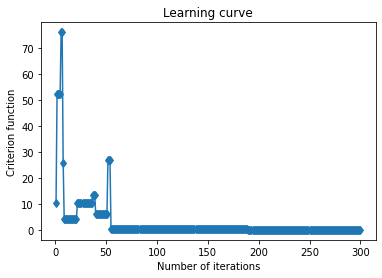

In [ ]:
if len(list_epoch) > 10:
  plt.xlabel("Number of epochs")
else:
  plt.xlabel("Number of iterations")

plt.ylabel("Criterion function")
plt.title("Learning curve")
plt.plot(index_list, J[:len(index_list)], marker = 'd')

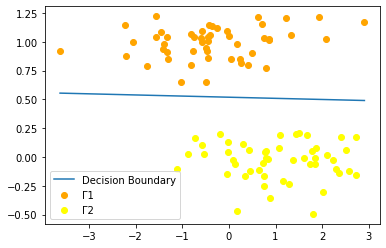

In [ ]:
graph_func(X, np.array(y), best_weight)

**Question 4(c)**

In [ ]:
data = open_datasets('dataset3_train.csv')
dataset_dimension = int(data.shape[0])
epoch = int(10000 / dataset_dimension)
list_epoch = []
J = np.zeros([10000])
w = 0.1 * np.ones([3, 1])
weights_list = np.ones([3, 10000])
index_list = []

for i in range(epoch):
    count = 0
    random_shuffle = shuffle(data)
    X = np.array(random_shuffle[:, :2])
    y = np.array(random_shuffle[:, 2])
    X = np.vstack([np.ones([1, 100]), X.T]).T
    reflected_data = copy.deepcopy(X)

    for ele in range(dataset_dimension):
        
        if y[ele] == 2:
            reflected_data[ele, :] *= -1
            
    list_epoch.append(i + 1)
    
    for j in range(dataset_dimension):
        index = i * epoch + j
        index_list.append(index + 1)
        z_n = np.dot(w.T, reflected_data[j, :])
        
        if z_n <= 0:
            w += 1 * reflected_data[j, :].reshape([3, 1])
            count = 0
        else:
            count += 1
        weights_list[:, index] = w.T

    if count == 100:
        print("Data is linearly separable")
        break
        
for i in range(10000):
    J[i] = criterion_function(weights_list[:, i], reflected_data)
    
best_weight = weights_list[:, np.argmin(J)]
print("The best weights are ", best_weight)
print("The algorithm did not converge!")
print("The cost function for the best weights is:", np.min(J))

The best weights are  [ 0.1        -0.06260918 -0.0992467 ]
The algorithm did not converge!
The cost function for the best weights is: 2.8539050900575993


In [ ]:
class_label = classifier(X, best_weight)
data = open_datasets('dataset3_test.csv')
X_test = np.array(data[:, :2])
y_test = np.array(data[:, 2])
X_test = np.vstack([np.ones([1, 100]), X_test.T]).T
test_label = classifier(X_test,best_weight)
print("The misclassification rate for the training_3 dataset = ", misclassification_rate(y, class_label), "%")
print("The misclassification rate for the testing_3 dataset = ", misclassification_rate(y_test, test_label), "%")

The misclassification rate for the training_3 dataset =  31.0 %
The misclassification rate for the testing_3 dataset =  31.0 %


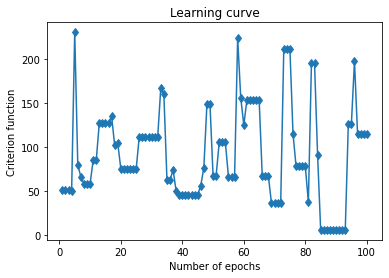

In [ ]:
if len(list_epoch) > 10:
  plt.xlabel("Number of epochs")
else:
  plt.xlabel("Number of iterations")

plt.ylabel("Criterion function")
plt.title("Learning curve")
plt.plot(list_epoch, J[:len(list_epoch)], marker = 'd')

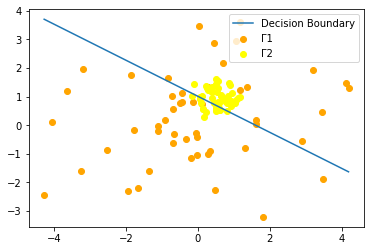

In [ ]:
graph_func(X, np.array(y), best_weight)

**Question 4(d)**

In [ ]:
data = np.load('breast_cancer_train.npy')
dataset_dimension = int(data.shape[0])
epoch = int(10000 / dataset_dimension)
list_epoch = []
w = 0.1 * np.ones([feature_size, 1])
weights_list = np.ones([feature_size, 10000])
index_list = []
J = np.zeros([10000])
count_norm = 0

for i in range(epoch + 1):
    count = 0
    random_shuffle = shuffle(data)
    X = random_shuffle[:, 1:]
    y = random_shuffle[:, 0]
    X = normalize_data(X)
    X = np.vstack([np.ones([1, dataset_dimension]), X.T]).T
    reflected_data = copy.deepcopy(X)
    feature_size = X.shape[1]

    for ele in range(dataset_dimension):
        
        if y[ele] == 2:
            reflected_data[ele, :] *= -1
    
    list_epoch.append(i+1)
    
    for j in range(dataset_dimension):
        count_norm += 1
        index_list.append(count_norm)
        z_n = np.dot(w.T, reflected_data[j, :])
        
        if z_n <= 0:
            w += 1 * reflected_data[j, :].reshape([feature_size, 1])
            count = 0
        else:
            count += 1
        
        if count_norm < 10000:
            weights_list[:, count_norm] = w.T
                
    if count_norm == 10000:
        break
    
    if count == dataset_dimension:
        print("The given data is linearly separable")
        break

for i in range(10000):
    J[i] = criterion_function(weights_list[:, i], reflected_data)

best_weight = weights_list[:, np.argmin(J)]
print("The best weights are ", best_weight)
print("The algorithm did not converge!")
print("The cost function for the best weights is:", np.min(J))

The best weights are  [-2.9         0.47626323  0.57319307  0.52727585  1.51251949 -0.38371898
  0.2802855   1.88581273  2.22655168 -0.33052896 -0.84643532  0.66144973
 -0.1257766   0.67390621  1.71922711 -0.99063808 -0.70475287 -0.81328097
 -0.08615674 -0.45297673 -2.17513405  0.73664957  0.943326    0.82023753
  1.96125557 -0.04622098  1.23919875  2.15981505  2.07330953  0.31759419
 -0.30756744]
The algorithm did not converge!
The cost function for the best weights is: 2.87406664598328


In [ ]:
class_label = classifier(X, best_weight)
data_test = np.load('breast_cancer_test.npy')
X_test = np.array(data_test[:, 1:])
y_test = np.array(data_test[:, 0])
X_test = normalize_data(X_test)
X_test = np.vstack([np.ones([1, int(data_test.shape[0])]), X_test.T]).T
test_label = classifier(X_test, best_weight)
print("The misclassification rate for the training dataset = ", misclassification_rate(y, class_label), "%")
print("The misclassification rate for the testing dataset = ", misclassification_rate(y_test, test_label), "%")

The misclassification rate for the training dataset =  2.9166666666666665 %
The misclassification rate for the testing dataset =  58.42696629213483 %


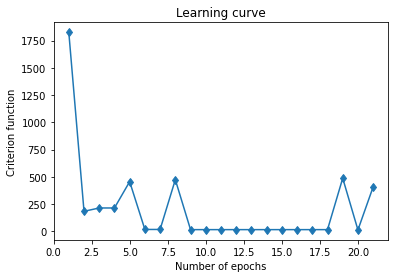

In [ ]:
if len(list_epoch) > 10:
  plt.xlabel("Number of epochs")
else:
  plt.xlabel("Number of iterations")

plt.ylabel("Criterion function")
plt.title("Learning curve")
plt.plot(list_epoch, J[:len(list_epoch)], marker = 'd')

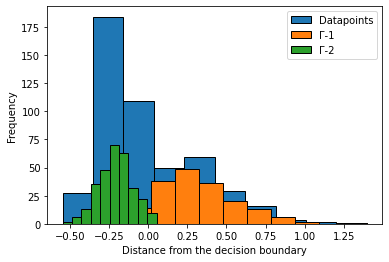

In [ ]:
"""
This function is based on chugg_foo() function in Prof. Chugg's nearest_means_classifier notebook
https://github.com/keithchugg/ee559_spring2023/blob/main/lecture/nearest_means_classifier.ipynb
"""
data_histx = data[:, 1:]
data_histy = data[:, 0]
data_histx = normalize_data(data_histx)
data_histx = np.vstack([np.ones([1, dataset_dimension]), data_histx.T]).T
data_list = []

for i in range(dataset_dimension):
    value = np.dot(best_weight.T, data_histx[i, :]) / np.linalg.norm(best_weight)
    data_list.append([value])

data_list = np.array([data_list]).reshape(480, 1)
class_1 = data_list[data_histy == 1]
class_2 = data_list[data_histy == 2]
plt.hist(data_list, label = 'Datapoints', edgecolor = 'black')
plt.hist(class_1, label = 'Γ-1', edgecolor = 'black')
plt.hist(class_2, label = 'Γ-2', edgecolor = 'black')
plt.xlabel("Distance from the decision boundary")
plt.ylabel("Frequency")
plt.legend()

5.(c) Repeat problem 4(d) (i.e., the breast cancer data) using this Logistic regression and compare the results to that obtained with perceptron learning.

In [344]:
def sigmoid(x):
    pos = np.abs(x)
    sigmoid_pos = 1.0 / (1.0 + np.exp(-pos))
    magnitude = np.sign(x)
    return (magnitude < 0) + magnitude * sigmoid_pos

In [345]:
def diff_softmax(w_trans, col):
    data_dimension = col.shape[0]
    J = 0
    
    for i in range(data_dimension):
        J += math.log(1 + math.exp(np.dot(-w_trans.T, col[i, :])))
    
    return J

In [355]:
data = np.load('breast_cancer_train.npy')
reorder_data = shuffle(data, random_state = 5)
data_dimension = int(data.shape[0]) 
X = reorder_data[:, 1:]
y = reorder_data[:, 0]
X = normalize_data(X)
w = 0.1 * np.ones([feature_size, 1])
weights_list = np.ones([feature_size, 10000])
index_list = []
count_norm = 0
J = np.zeros([10000])
X = np.vstack([np.ones([1, data_dimension]), X.T]).T
reflected_data = copy.deepcopy(X)
feature_size = X.shape[1]
epoch = int(10000 / data_dimension)
list_epoch = []

for i in range(data_dimension):
    
    if y[i] == 2:
        reflected_data[i, :] *= -1

for i in range(epoch + 1):
    count = 0
    list_epoch.append(i + 1)
    
    for j in range(data_dimension):
        count_norm += 1
        index_list.append(count_norm)
        z_n = sigmoid(np.dot(-w.T, reflected_data[i, :])) * reflected_data[i, :]
        w += 1 * z_n.reshape([feature_size, 1])
        if count_norm < 10000:
            weights_list[:, count_norm] = w.T
    
    if count_norm == 10000:
        break

for i in range(10000):
    J[i] = diff_softmax(weights_list[:, i], reflected_data)

best_weight = weights_list[:, np.argmin(J)]
print("The best weights are", best_weight)
print('The algorithm did not converge!')
print("The cost function for the best weights:", np.min(J))

The best weights are [-5.72707722  0.44438746  0.10847659  0.55303533  2.03471187 -0.36352143
  1.57560504  3.92334708  3.81544624 -0.50395992 -1.04778206  1.69585644
  0.04150261  1.80112733  3.57077807 -2.28583852 -0.13951024  0.25566198
 -0.65878902 -0.73564728 -0.77212341  0.75621668  0.36408319  0.88795019
  2.62728486 -0.34075008  2.35390578  2.95693219  2.44621406  0.01735879
 -0.35896718]
The algorithm did not converge!
The cost function for the best weights: 77.84901027516679


In [356]:
class_label = classifier(X, best_weight)
data_test = np.load('breast_cancer_test.npy')
X_test = np.array(data_test[:, 1:])
y_test = np.array(data_test[:, 0])
X_test = normalize_data(X_test)
X_test = np.vstack([np.ones([1, int(data_test.shape[0])]), X_test.T]).T
test_label = classifier(X_test, best_weight)
print("The misclassification rate for the training dataset = ", misclassification_rate(y, class_label), "%")
print("The misclassification rate for the testing dataset = ", misclassification_rate(y_test, test_label), "%")

The misclassification rate for the training dataset =  5.833333333333333 %
The misclassification rate for the testing dataset =  61.79775280898876 %


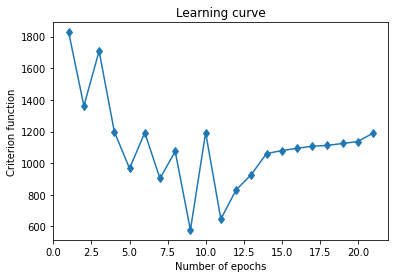

In [350]:
if len(list_epoch) > 10:
  plt.xlabel("Number of epochs")
else:
  plt.xlabel("Number of iterations")

plt.ylabel("Criterion function")
plt.title("Learning curve")
plt.plot(list_epoch, J[::data_dimension], marker = 'd')

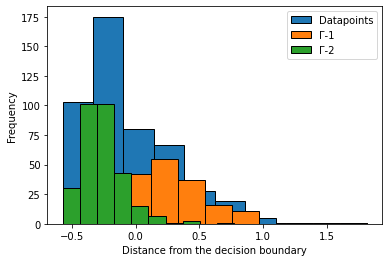

In [351]:
"""
This function is based on chugg_foo() function in Prof. Chugg's nearest_means_classifier notebook
https://github.com/keithchugg/ee559_spring2023/blob/main/lecture/nearest_means_classifier.ipynb
"""
data_hist_x = data[:, 1:]
data_hist_y = data[:, 0]
data_hist_x = normalize_data(data_hist_x)
data_hist_x = np.vstack([np.ones([1, data_dimension]), data_hist_x.T]).T
data_list = []

for i in range(data_dimension):
    value = np.dot(best_weight.T, data_hist_x[i, :]) / np.linalg.norm(best_weight)
    data_list.append([value])

data_list = np.array([data_list]).reshape(480, 1)
class_1 = data_list[data_hist_y == 1]
class_2 = data_list[data_hist_y == 2]
plt.hist(data_list, label = 'Datapoints', edgecolor = 'black')
plt.hist(class_1, label = 'Γ-1', edgecolor = 'black')
plt.hist(class_2, label = 'Γ-2', edgecolor = 'black')
plt.xlabel("Distance from the decision boundary")
plt.ylabel("Frequency")
plt.legend()